# HW4 Chenyu Zhao

# Problem 4.1

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy.stats import pearsonr

In [2]:
data = pd.read_csv('BetaExample.txt',sep="|")
data.DATE=pd.to_datetime(data.DATE)
data=data.dropna()

In [3]:
data1=data.loc[data.TICKER=="IBM"]
data2=data.loc[data.TICKER=="AAPL"]
data3=data.loc[data.TICKER=="TSLA"]

## (a)

### IBM

In [4]:
d=data1[data1.DATE<pd.to_datetime("2015-01-01")]
X=np.array(d[["RM"]])
y=np.array(d["R"])

In [5]:
est = sm.OLS(y, X)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.332
Model:                            OLS   Adj. R-squared:                  0.332
Method:                 Least Squares   F-statistic:                     3133.
Date:                Wed, 03 Apr 2019   Prob (F-statistic):               0.00
Time:                        10:09:54   Log-Likelihood:                 17657.
No. Observations:                6301   AIC:                        -3.531e+04
Df Residuals:                    6300   BIC:                        -3.531e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.9067      0.016     55.970      0.0

**$\beta_{IBM}=0.91$, P is low, we reject the null hypothesis.**

### AAPL

In [6]:
d=data2[data2.DATE<pd.to_datetime("2015-01-01")]
X=np.array(d[["RM"]])
y=np.array(d["R"])

In [7]:
est = sm.OLS(y, X)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.192
Model:                            OLS   Adj. R-squared:                  0.192
Method:                 Least Squares   F-statistic:                     1500.
Date:                Wed, 03 Apr 2019   Prob (F-statistic):          1.61e-294
Time:                        10:09:54   Log-Likelihood:                 13915.
No. Observations:                6301   AIC:                        -2.783e+04
Df Residuals:                    6300   BIC:                        -2.782e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.1363      0.029     38.728      0.0

**$\beta_{AAPL}=1.14$, P is low, we reject the null hypothesis.**

### TSLA

In [8]:
d=data3[data3.DATE<pd.to_datetime("2015-01-01")]
X=np.array(d[["RM"]])
y=np.array(d["R"])

In [9]:
est = sm.OLS(y, X)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.122
Model:                            OLS   Adj. R-squared:                  0.121
Method:                 Least Squares   F-statistic:                     157.4
Date:                Wed, 03 Apr 2019   Prob (F-statistic):           6.51e-34
Time:                        10:09:54   Log-Likelihood:                 2219.2
No. Observations:                1135   AIC:                            -4436.
Df Residuals:                    1134   BIC:                            -4431.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.3101      0.104     12.548      0.0

**$\beta_{TSLA}=1.14$, P is low, we reject the null hypothesis.**

## (b)

let $h=(a,b,c)^T$

from self-financing condition, we get $a+b+c=0$

from unit exposure to AAPL, we get $b=1$

from zero exposure to beta, we get $a\beta_{IBM}+b\beta_{AAPL}+c*\beta_{TSLA}=0$

we use following code to solve this linear problem

In [33]:
a = np.array([[1,1,1], [0,1,0],[0.91,1.14,1.31]])
b = np.array([0.0,1.0,0.0])
x = np.linalg.solve(a, b)
x

array([-0.425,  1.   , -0.575])

$\therefore h=(-0.425,1,-0.575)^T$

## (C)

In [11]:
d1=data1[data1.DATE>=pd.to_datetime("2015-01-01")]
d2=data2[data2.DATE>=pd.to_datetime("2015-01-01")]
d3=data3[data3.DATE>=pd.to_datetime("2015-01-01")]

In [17]:
sum(d1.R*(-0.425))+sum(d2.R*1)+sum(d3.R*(-0.575))

-0.021396825000000078

**cumulative sum of return in 2015 is -0.0214**

## (d)

In [13]:
ret=np.array(d1.R*(-0.425))+np.array(d2.R*1)+np.array(d3.R*(-0.575))
ret_m=np.array(data1[data1.DATE>=pd.to_datetime("2015-01-01")].RM)

In [14]:
pearsonr(ret,ret_m)

(0.02866801914913187, 0.6512598504889181)

**P-value is 0.65, not greater than 0.95. So it is not significantly different from 0.**

# Problem 4.2

## (a)

$$
    E[h'r]=\frac{1}{n}\sum_iE[r_i]=\beta E[r_m]+\frac{1}{n}\sum_iE[\epsilon_i]
$$

$$
V[h'r]=\frac{1}{n^2}\sum_i (\beta^2\sigma_m^2+\sigma_i^2)+\frac{1}{n^2}\sum_{i,j,i\ne j}\beta^2\sigma_m^2=\beta^2\sigma_m^2+\sum_i\frac{1}{n^2}\sigma_i^2
$$

$$
\therefore f(\beta,\sigma_m^2)=\beta^2\sigma_m^2 \qquad g(\sigma_1^2,\dots,\sigma_n^2)=\frac{1}{n^2}\sum_i \sigma_i^2
$$

## (b)

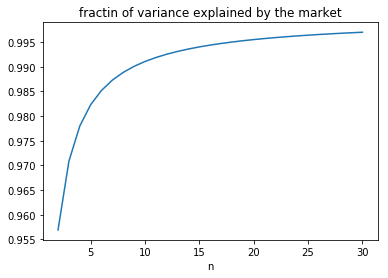

In [2]:
beta=0.5
sigmaM=0.2
sigmaI=0.03

def f(n):
    return beta**2*sigmaM**2

def g(n):
    return sigmaI**2/n

def fraction(n):
    return f(n)/(f(n)+g(n))

x=[]
y=[]
for i in range(2,31):
    x.append(i)
    y.append(fraction(i))
    
import matplotlib.pyplot as plt
plt.plot(x,y)
plt.title("fractin of variance explained by the market")
plt.xlabel('n')
plt.show()

## (c)

In this case,

$$
E[h'r]=\frac{1}{n}\sum_i\beta E[r_M]+E[\epsilon_i]
$$

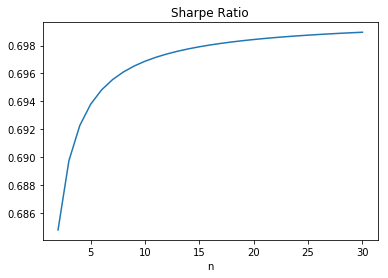

In [3]:
Eepsilon=1.5*sigmaI
ErM=0.07

def E(n):
    return beta*ErM+Eepsilon

def V(n):
    return f(n)+g(n)

def Sharpe(n):
    return (E(n)-0.01)/np.sqrt(V(n))

x=[]
y=[]
for i in range(2,31):
    x.append(i)
    y.append(Sharpe(i))
    
plt.plot(x,y)
plt.title("Sharpe Ratio")
plt.xlabel('n')
plt.show()

**If we change Sharpe of $\epsilon_i$ from 1.5 to 2.0**

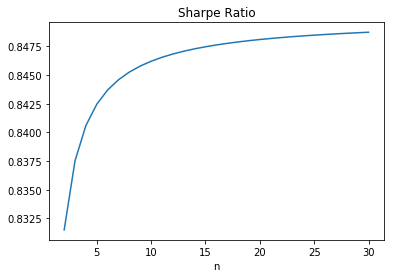

In [4]:
Eepsilon=2.0*sigmaI

x=[]
y=[]
for i in range(2,31):
    x.append(i)
    y.append(Sharpe(i))
    
plt.plot(x,y)
plt.title("Sharpe Ratio")
plt.xlabel('n')
plt.show()

## (d)

Suppose  Sharpe of  $\epsilon_i$  is 1.5

$$
E[h'r]=E[\epsilon_i]=1.5\sigma_i
$$

$$
V[h'r]=\sigma_i^2
$$

$$
\therefore Sharpe=\frac{1.5\sigma_i-0.01}{\sigma_i}=1.4
$$

Compare to above scenario, this is much better.